In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=84028217aa00b76299c46fc9743a6989


In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | palmer
Processing Record 9 of Set 1 | basoko
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | greece
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | awbari
Processing Record 18 of Set 1 | thunder bay
Processing Record 19 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | manakara
Processing Record 22 of Se

Processing Record 37 of Set 4 | winnemucca
Processing Record 38 of Set 4 | talnakh
Processing Record 39 of Set 4 | ketchenery
City not found. Skipping...
Processing Record 40 of Set 4 | shimoda
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | talaya
Processing Record 43 of Set 4 | nishihara
Processing Record 44 of Set 4 | batemans bay
Processing Record 45 of Set 4 | ferrol
Processing Record 46 of Set 4 | kaitangata
Processing Record 47 of Set 4 | jaru
Processing Record 48 of Set 4 | nyurba
Processing Record 49 of Set 4 | tilichiki
Processing Record 50 of Set 4 | jambi
Processing Record 1 of Set 5 | jalalpur pirwala
Processing Record 2 of Set 5 | masuguru
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | gangotri
City not found. Skipping...
Processing Record 5 of Set 5 | bitung
Processing Record 6 of Set 5 | itarema
Processing Record 7 of Set 5 | celestun
Processing Record 8 of Set 5 | lodja
Processing Record 9 of Set 5 | atar
Processing 

Processing Record 24 of Set 8 | puerto asis
Processing Record 25 of Set 8 | liepaja
Processing Record 26 of Set 8 | mersing
Processing Record 27 of Set 8 | longlac
City not found. Skipping...
Processing Record 28 of Set 8 | riyadh
Processing Record 29 of Set 8 | torbay
Processing Record 30 of Set 8 | skovorodino
Processing Record 31 of Set 8 | taketa
Processing Record 32 of Set 8 | aktau
Processing Record 33 of Set 8 | labuhan
Processing Record 34 of Set 8 | candawaga
City not found. Skipping...
Processing Record 35 of Set 8 | lamu
Processing Record 36 of Set 8 | curumani
Processing Record 37 of Set 8 | banda aceh
Processing Record 38 of Set 8 | burica
City not found. Skipping...
Processing Record 39 of Set 8 | acajutla
Processing Record 40 of Set 8 | lazarev
Processing Record 41 of Set 8 | unity
Processing Record 42 of Set 8 | aitape
Processing Record 43 of Set 8 | pandan
Processing Record 44 of Set 8 | san quintin
Processing Record 45 of Set 8 | rehnan
Processing Record 46 of Set 8 |

Processing Record 10 of Set 12 | suntar
Processing Record 11 of Set 12 | majene
Processing Record 12 of Set 12 | shakawe
Processing Record 13 of Set 12 | katsuura
Processing Record 14 of Set 12 | bismarck
Processing Record 15 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 16 of Set 12 | phumi samraong
City not found. Skipping...
Processing Record 17 of Set 12 | cangucu
Processing Record 18 of Set 12 | beni
Processing Record 19 of Set 12 | porosozero
Processing Record 20 of Set 12 | caravelas
Processing Record 21 of Set 12 | vanavara
Processing Record 22 of Set 12 | te anau
Processing Record 23 of Set 12 | hay river
Processing Record 24 of Set 12 | san vicente
Processing Record 25 of Set 12 | satitoa
City not found. Skipping...
Processing Record 26 of Set 12 | osa
Processing Record 27 of Set 12 | san policarpo
Processing Record 28 of Set 12 | karaul
City not found. Skipping...
Processing Record 29 of Set 12 | kincardine
Processing Record 30 of Set 12 | manzil jamil


In [17]:
len(city_data)

553

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.8697,-73.8203,48.15,63,18,9.40,CL,2021-07-25 17:00:53
1,Dikson,73.5069,80.5464,38.89,88,45,13.73,RU,2021-07-25 16:59:03
2,Ushuaia,-54.8000,-68.3000,38.86,70,20,25.32,AR,2021-07-25 17:00:00
3,Bluff,-46.6000,168.3333,47.80,83,100,5.44,NZ,2021-07-25 17:00:54
4,Punta Arenas,-53.1500,-70.9167,39.11,80,87,16.13,CL,2021-07-25 17:00:54
5,Rikitea,-23.1203,-134.9692,70.07,65,97,3.67,PF,2021-07-25 17:00:55
6,Palmer,42.1584,-72.3287,71.38,81,98,1.99,US,2021-07-25 17:00:55
7,Basoko,1.2391,23.6160,80.38,58,64,0.31,CD,2021-07-25 17:00:55
8,Bambous Virieux,-20.3428,57.7575,71.85,56,40,11.50,MU,2021-07-25 16:56:18
9,Bredasdorp,-34.5322,20.0403,56.28,76,100,3.44,ZA,2021-07-25 16:56:06


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ancud,CL,2021-07-25 17:00:53,-41.8697,-73.8203,48.15,63,18,9.40
1,Dikson,RU,2021-07-25 16:59:03,73.5069,80.5464,38.89,88,45,13.73
2,Ushuaia,AR,2021-07-25 17:00:00,-54.8000,-68.3000,38.86,70,20,25.32
3,Bluff,NZ,2021-07-25 17:00:54,-46.6000,168.3333,47.80,83,100,5.44
4,Punta Arenas,CL,2021-07-25 17:00:54,-53.1500,-70.9167,39.11,80,87,16.13
5,Rikitea,PF,2021-07-25 17:00:55,-23.1203,-134.9692,70.07,65,97,3.67
6,Palmer,US,2021-07-25 17:00:55,42.1584,-72.3287,71.38,81,98,1.99
7,Basoko,CD,2021-07-25 17:00:55,1.2391,23.6160,80.38,58,64,0.31
8,Bambous Virieux,MU,2021-07-25 16:56:18,-20.3428,57.7575,71.85,56,40,11.50
9,Bredasdorp,ZA,2021-07-25 16:56:06,-34.5322,20.0403,56.28,76,100,3.44


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

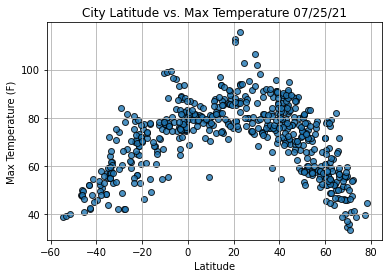

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

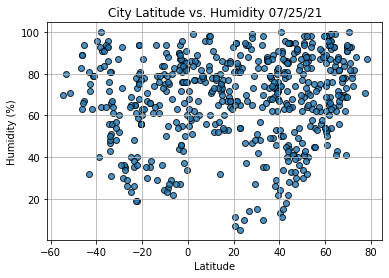

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

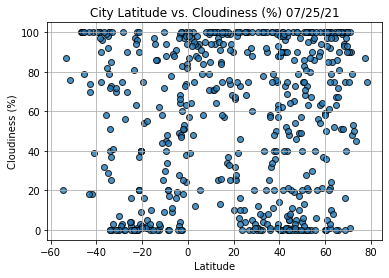

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

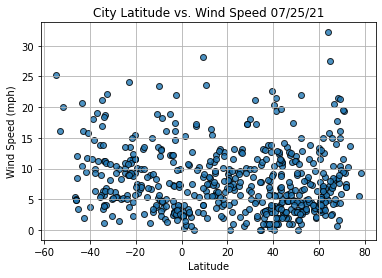

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()